## Test the best constant for generating random covariane matrices

In [20]:
from data import *

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

plt.style.use(['science', 'ieee'])

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [21]:
G = generate_random_dag(20, 3, seed=123)

In [22]:
X, cov, cov_prev, G_bi = generate_linear_sem_correlated(G, 1000, 0.5, seed=123, return_cov=True, return_graph=True)

In [23]:
np.matrix.trace(np.linalg.matrix_power(np.eye(20) + nx.to_numpy_array(G_bi) * nx.to_numpy_array(G_bi), 20)) - 20

172613992503007.53

In [24]:
# L1 norm
np.sum(np.abs(nx.to_numpy_array(G_bi)))

55.17166031745094

In [35]:
np.sum(np.abs(nx.to_numpy_array(G)))

40.17166031745094

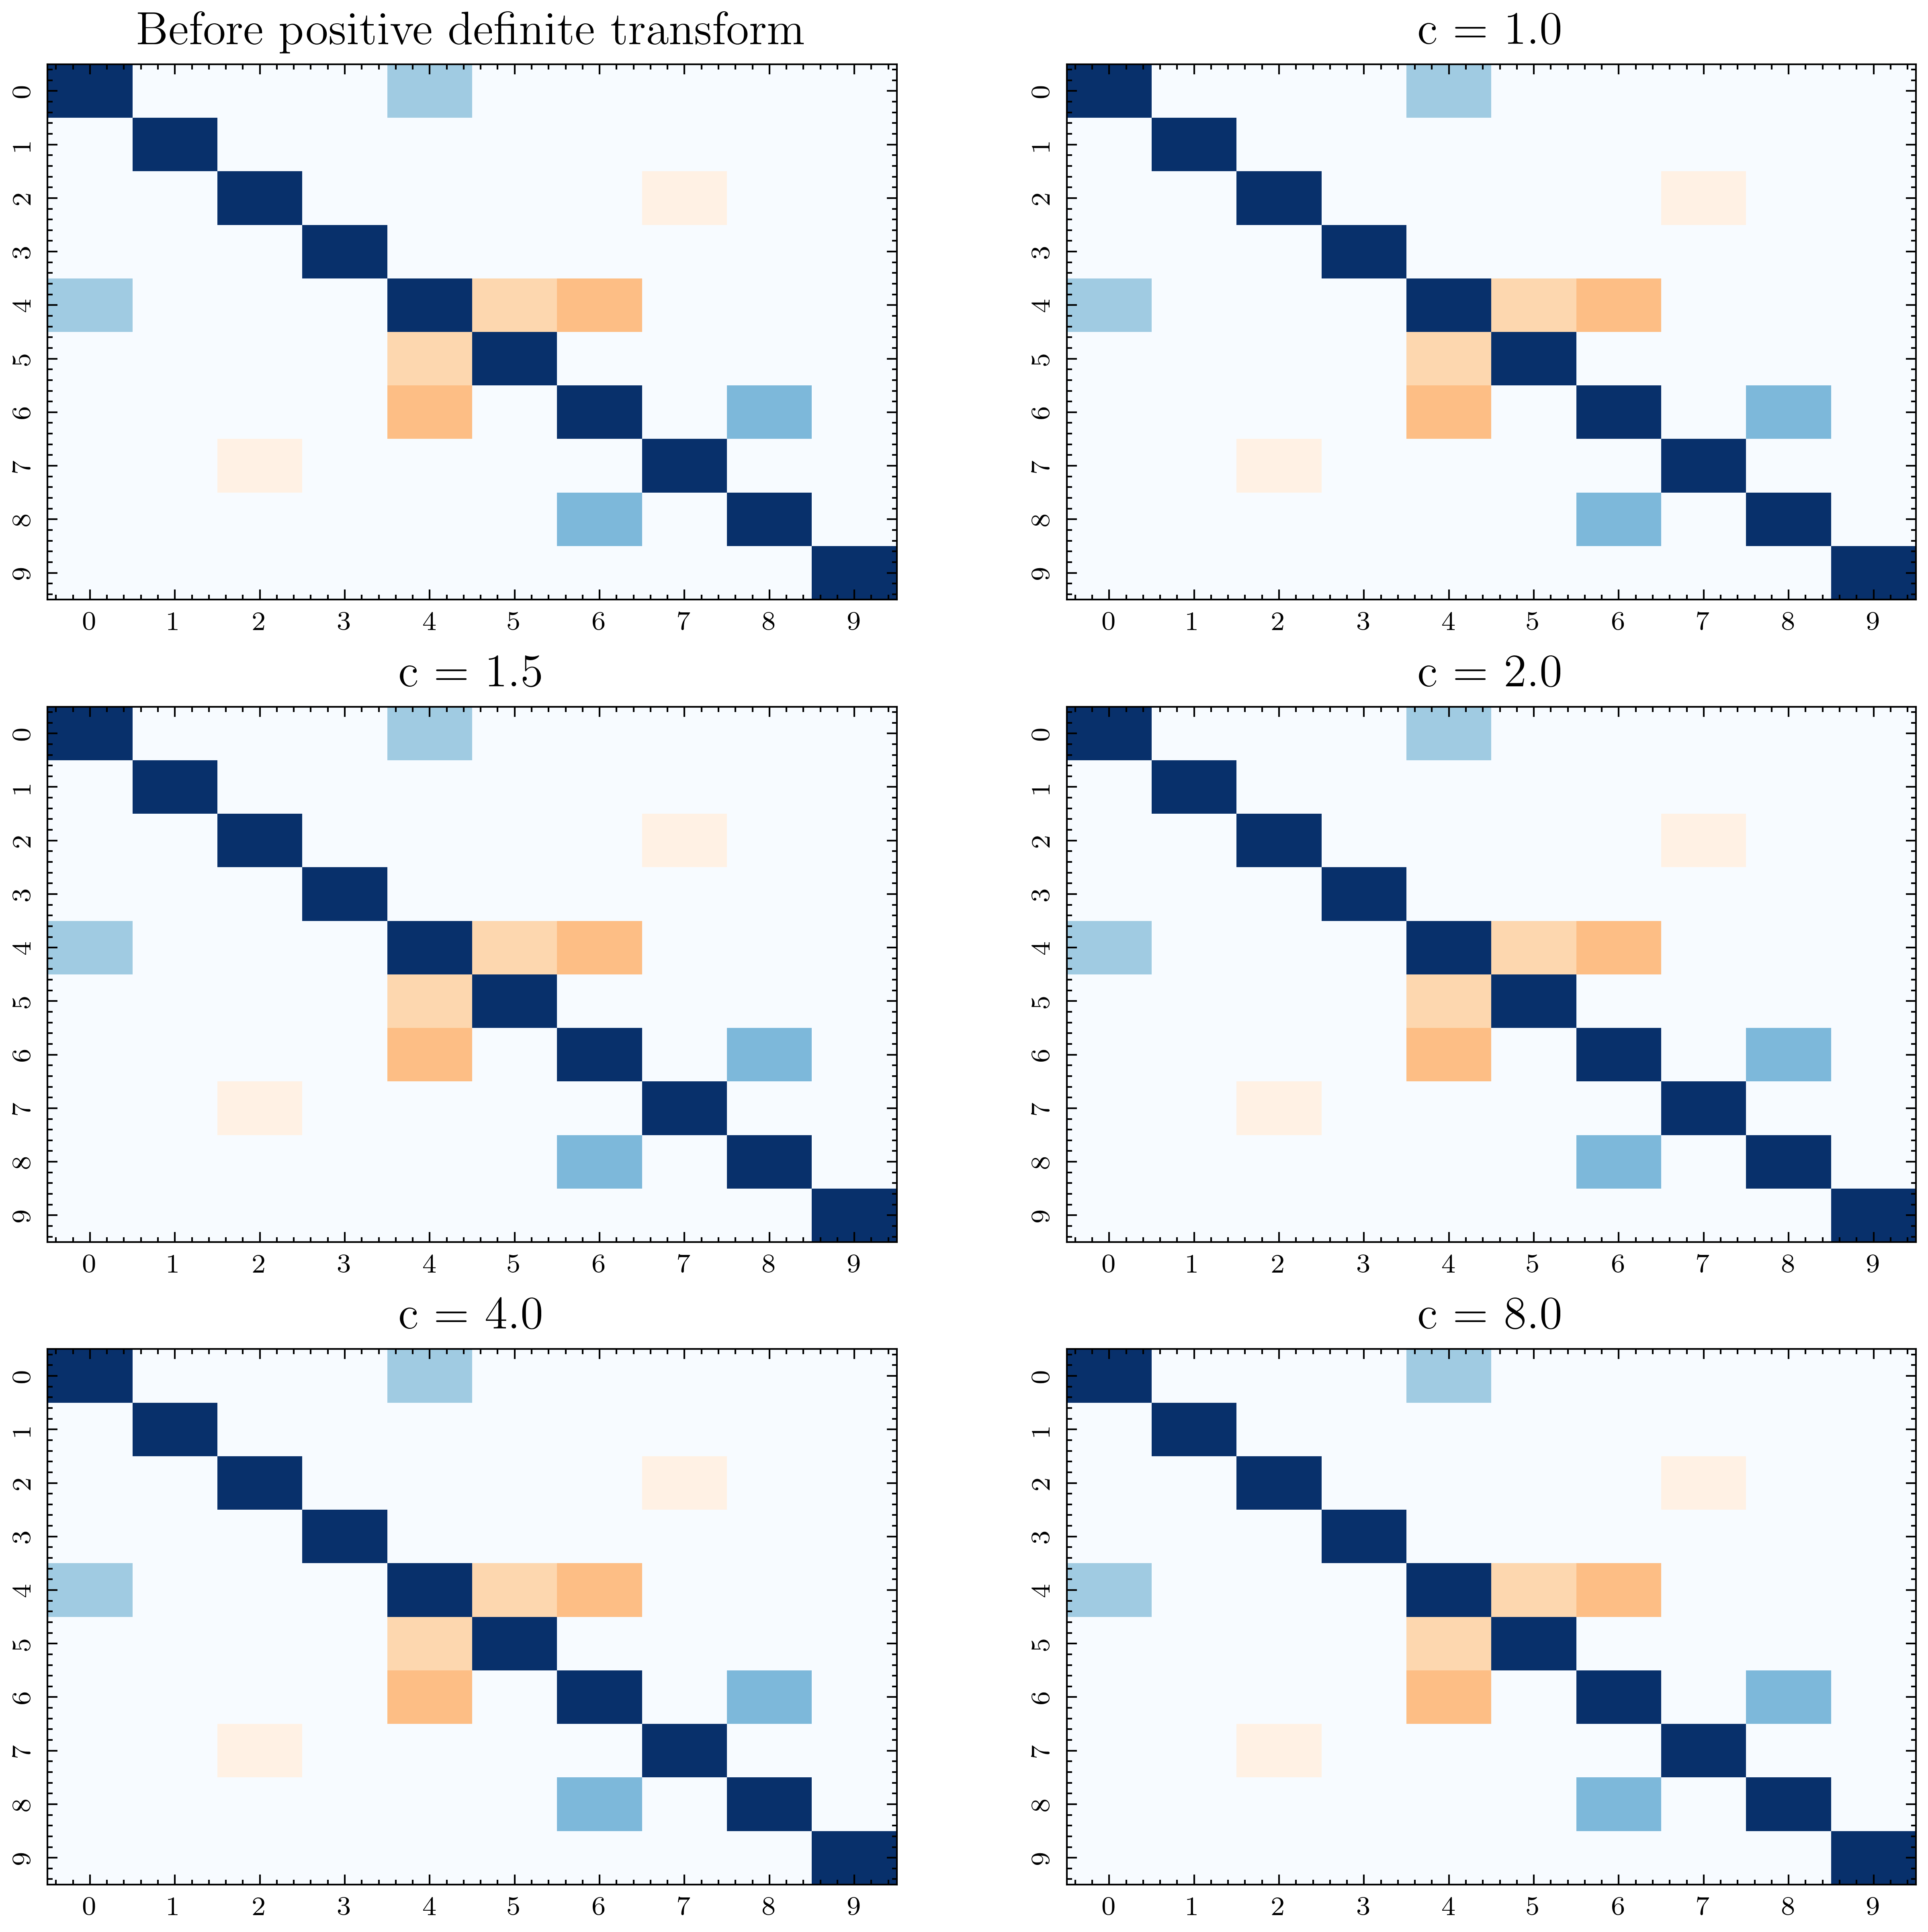

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.heatmap(cov_prev, ax=axes.ravel()[0], cmap=newcmp, vmin=-1, vmax=1)
axes.ravel()[0].set_title('Before positive definite transform', fontsize=14)
axes.ravel()[0].collections[0].colorbar.remove()
# axes.ravel()[0].axis('off')
for _, spine in axes[0, 0].spines.items():
    spine.set_visible(True)

for idx, c in enumerate([1.0, 1.5, 2.0, 4.0, 8.0]):
    X, cov, cov_prev = generate_linear_sem_correlated(G, 1000, 0.5, seed=123, return_cov=True, const=c)
    sns.heatmap(cov, ax=axes.ravel()[idx+1], cmap=newcmp, vmin=-1, vmax=1)
    axes.ravel()[idx+1].set_title(f'c = {c}', fontsize=14)
    # remove the colorbar
    axes.ravel()[idx+1].collections[0].colorbar.remove()
    # remove the axis
    # axes.ravel()[idx+1].axis('off')
    # remove the frame
    for _, spine in axes.ravel()[idx+1].spines.items():
        spine.set_visible(True)


plt.savefig('plots/const_psd_transform.png', dpi=300, bbox_inches='tight', facecolor='white')

## Plot examples

In [25]:
G1 = generate_random_dag(10, 3, seed=123)

X, G2 = generate_linear_sem_correlated(G1, 1000, 0.3, seed=123, return_graph=True)

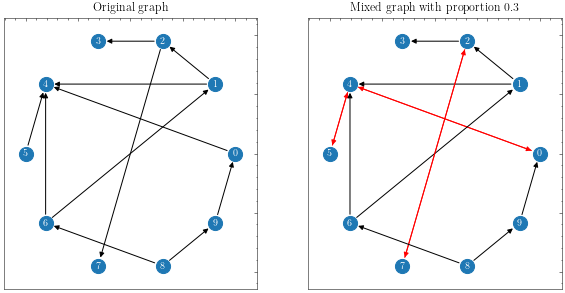

In [26]:
pos = nx.circular_layout(G1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

nx.draw_networkx_nodes(G1, pos, node_size=200, ax=axes[0], )
nx.draw_networkx_edges(G1, pos, ax=axes[0])
nx.draw_networkx_labels(G1, pos, labels={node: node for node in G1.nodes()}, font_size=10, font_color='w', ax=axes[0])

axes[0].set_title('Original graph')

# create a list of edge colors based on the edge type
edge_colors = ['r' if G2.has_edge(u, v) and G2.has_edge(v, u) else 'k' for u, v in G2.edges()]

nx.draw_networkx_nodes(G2, pos, node_size=200, ax=axes[1])
nx.draw_networkx_edges(G2, pos, edge_color=edge_colors, ax=axes[1])
nx.draw_networkx_labels(G2, pos, labels={node: node for node in G2.nodes()}, font_size=10, font_color='w', ax=axes[1])

axes[1].set_title('Mixed graph with proportion 0.3')

plt.savefig('plots/mixed_graph_example.png', dpi=300, bbox_inches='tight', facecolor='white')

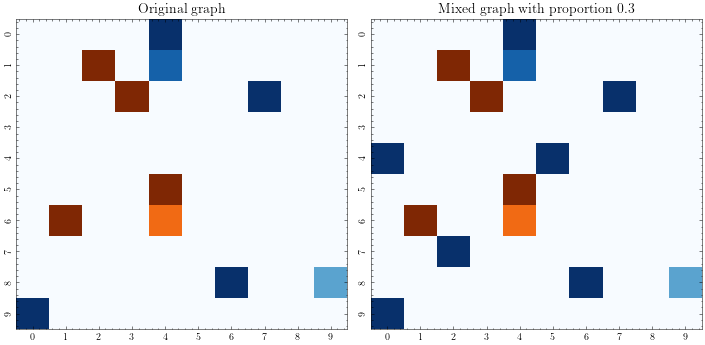

In [34]:
# Heatmap of G1 and G2 adjacency matrix
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(nx.to_numpy_array(G1), ax=axes[0], cmap=newcmp, vmin=-1, vmax=1)
axes[0].set_title('Original graph', fontsize=14)
for _, spine in axes[0].spines.items():
    spine.set_visible(True)

sns.heatmap(nx.to_numpy_array(G2), ax=axes[1], cmap=newcmp, vmin=-1, vmax=1)
axes[1].set_title('Mixed graph with proportion 0.3', fontsize=14)
for _, spine in axes[1].spines.items():
    spine.set_visible(True)


axes[0].collections[0].colorbar.remove()
axes[1].collections[0].colorbar.remove()

plt.tight_layout()

plt.savefig('plots/mixed_graph_adjacency.png', dpi=300, bbox_inches='tight', facecolor='white')